In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
%matplotlib inline

In [2]:
#Read the csv file
df = pd.read_csv('tmdb-movies.csv',encoding='utf-8')

In [3]:
#To get the first 5 rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Shape of the dataset
df.shape

(10866, 21)

In [5]:
#To get the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#To generate the descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#To get the columns present in the dataset
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
#To know the total null values in each column
df[['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj']].isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#To fill the null values with 0
df.fillna(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,0,Bruce Brown,0,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,0,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,0,Eldar Ryazanov,0,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,0,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


# Data Cleaning

In [10]:
#Return boolean Series denoting duplicate rows
sum(df.duplicated())

1

In [11]:
#Return DataFrame with duplicate rows removed
df.drop_duplicates(inplace = True)

In [12]:
#Shape of the dataset
df.shape

(10865, 21)

In [13]:
#Convert argument to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
#Returns first 5 rows of the column
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [14]:
#Shape of the column 'budget'
df[(df['budget']==0)].shape

(5696, 21)

In [15]:
#Shape of the column 'revenue'
df[(df['revenue']==0)].shape

(6016, 21)

# Exploratory Data Analysis

# 4) Which are the movies with the most and least earned revenue?

In [16]:
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)


In [17]:
df['revenue'] = df['revenue'].replace(0,np.NAN)
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Shattered Glass


,1386,5067
id,19995,13537
imdb_id,tt0499549,tt0323944
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
homepage,http://www.avatarmovie.com/,NaN
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN


# 1) Which are the movies with the third-lowest and third-highest budget?

In [18]:
df.nlargest(3,'budget','first').iloc[-1]['original_title']

"Pirates of the Caribbean: At World's End"

In [19]:
df['budget'].shape

(10865,)

In [20]:
df['budget'] = df['budget'].replace(0,np.NAN)

In [21]:
df['sorted'] = df['budget'].sort_index(ascending=True)

In [22]:
df['sorted'].drop_duplicates(inplace=True)

In [23]:
df['sorted']

0        150000000.0
2        110000000.0
3        200000000.0
4        190000000.0
5        135000000.0
            ...     
10820       315000.0
10827      1377800.0
10829      4653000.0
10848      5115000.0
10865        19000.0
Name: sorted, Length: 557, dtype: float64

In [24]:
df['sorted'].shape

(557,)

In [25]:
df.nsmallest(3,'sorted','first').iloc[-1]['original_title']

'Angus, Thongs and Perfect Snogging'

# 3) What is the most common Genre for Vin Diesel & Emma Watson movies?

In [26]:
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return data

In [54]:
df['actor_flims'] = count_genre('cast')
df['gen'] = count_genre('genres')

df[(df['actor_flims']=='Vin Diesel') & (df['actor_flims']=='Emma Watson')]['gen']

Series([], Name: gen, dtype: object)

In [60]:
df[(df['actor_flims']=='Vin Diesel')]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,sorted,actor_flims,gen,btw_yrs
20,158852,tt1964418,5.462138,190000000.0,209035668.0,Tomorrowland,Britt Robertson|George Clooney|Raffey Cassidy|...,http://movies.disney.com/tomorrowland,Brad Bird,Imagine a world where nothing is impossible.,...,2015-05-19,1899,6.2,2015,1.747999e+08,1.923127e+08,190000000.0,Vin Diesel,Adventure,0
205,256924,tt1772288,0.690479,10000000.0,10835752.0,Danny Collins,Al Pacino|Annette Bening|Jennifer Garner|Bobby...,NaN,Dan Fogelman,A letter from John Lennon changed his life,...,2015-03-20,114,6.6,2015,9.199996e+06,9.968887e+06,10000000.0,Vin Diesel,Drama,0
2979,21861,tt1194616,0.765289,NaN,NaN,LOL (Laughing Out Loud),Sophie Marceau|Christa ThÃ©ret|Alexandre Astie...,NaN,Lisa Azuelos,NaN,...,2008-06-06,235,6.4,2008,0.000000e+00,0.000000e+00,NaN,Vin Diesel,Science Fiction,0
7312,525,tt0080455,1.607219,27000000.0,115229890.0,The Blues Brothers,Dan Aykroyd|John Belushi|James Brown|Cab Callo...,NaN,John Landis,They'll never get caught. They're on a mission...,...,1980-06-17,614,7.3,1980,7.144299e+07,3.049025e+08,27000000.0,Vin Diesel,Comedy,0
9067,6396,tt0133189,0.460139,NaN,299200.0,SLC Punk,Matthew Lillard|Michael A. Goorjian|Annabeth G...,NaN,James Merendino,God bless America... they're going to need it.,...,1998-09-24,40,7.2,1998,0.000000e+00,4.002385e+05,NaN,Vin Diesel,Foreign,0


In [58]:
df[(df['actor_flims']=='Emma Watson')]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,sorted,actor_flims,gen,btw_yrs
726,228326,tt2262227,1.545055,50000000.0,97437106.0,The Book of Life,Diego Luna|Channing Tatum|Zoe Saldana|Christin...,http://www.bookoflifemovie.com/,Jorge R. Gutierrez,NaN,...,2014-10-01,531,7.3,2014,4.605455e+07,8.974845e+07,50000000.0,Emma Watson,Drama,0
3258,15465,tt1134801,0.168750,NaN,NaN,Bouquet final,Didier Bourdon|Marc-AndrÃ© Grondin|BÃ©rÃ©nice ...,NaN,Michel Delgado,NaN,...,2008-11-05,12,5.4,2008,0.000000e+00,0.000000e+00,NaN,Emma Watson,Comedy,0
6568,9693,tt0206634,2.108369,76000000.0,69959751.0,Children of Men,Clive Owen|Michael Caine|Julianne Moore|Charli...,http://www.universalstudiosentertainment.com/c...,Alfonso CuarÃ³n,The future's a thing of the past.,...,2006-09-22,1211,7.3,2006,8.220686e+07,7.567330e+07,76000000.0,Emma Watson,Drama,0
9137,21736,tt0120661,0.207668,NaN,76447420.0,Everest,Liam Neeson|Ed Viesturs|David Breashears|Tracy...,NaN,David Breashears|Stephen Judson|Greg MacGillivray,Towering above everything you have seen before.,...,1998-03-06,11,6.0,1998,0.000000e+00,1.022634e+08,NaN,Emma Watson,Comedy,0


In [62]:
s = pd.merge(df[(df['actor_flims']=='Vin Diesel')], df[(df['actor_flims']=='Emma Watson')], on='gen')

In [65]:
s['gen'].unique()

array(['Drama', 'Comedy'], dtype=object)

# 5) What is the average runtime of movies in the year 2006?

In [28]:
df[df['release_year']==2006]['runtime'].mean()

101.68382352941177

# 2) What is the average number of words in movie titles between the years 2000-2005?

In [29]:
df['btw_yrs'] = df[(df['release_year']>=2000) & (df['release_year']<=2005)]['original_title']
df['btw_yrs'] = df['btw_yrs'].replace(np.NAN,0)

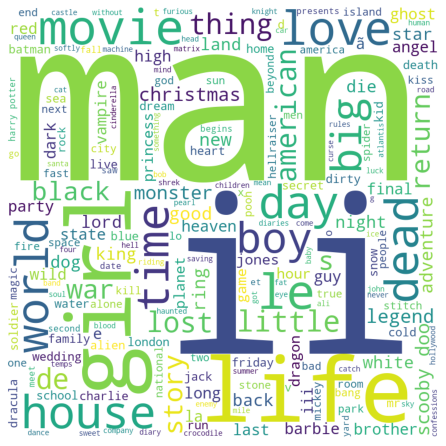

In [32]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['btw_yrs']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split()   
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()   
    comment_words += " ".join(tokens)+" "
              
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [31]:
df[df['btw_yrs']!=0]
#Man is the most frequently occurred word

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,sorted,actor_flims,gen,btw_yrs
2633,120,tt0120737,8.575419,93000000.0,871368364.0,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net/,Peter Jackson,One ring to rule them all,...,2001-12-18,6079,7.8,2001,1.145284e+08,1.073080e+09,93000000.0,David Henrie,Comedy,The Lord of the Rings: The Fellowship of the Ring
2634,671,tt0241527,8.021423,125000000.0,976475550.0,Harry Potter and the Philosopher's Stone,Daniel Radcliffe|Rupert Grint|Emma Watson|John...,http://harrypotter.warnerbros.com/harrypottera...,Chris Columbus,Let the Magic Begin.,...,2001-11-16,4265,7.2,2001,1.539360e+08,1.202518e+09,125000000.0,Thomas Ian Nicholas,Horror,Harry Potter and the Philosopher's Stone
2635,1018,tt0166924,4.436367,15000000.0,20117339.0,Mulholland Drive,Naomi Watts|Laura Harring|Ann Miller|Dan Heday...,NaN,David Lynch,An actress longing to be a star. A woman searc...,...,2001-05-16,709,7.4,2001,1.847232e+07,2.477426e+07,15000000.0,Jon Heder,Comedy,Mulholland Drive
2636,141,tt0246578,3.851009,6000000.0,1270522.0,Donnie Darko,Jake Gyllenhaal|Patrick Swayze|Drew Barrymore|...,NaN,Richard Kelly,Dark. Darker. Darko.,...,2001-01-18,1777,7.5,2001,7.388929e+06,1.564633e+06,6000000.0,Jodie Sweetin,Documentary,Donnie Darko
2637,585,tt0198781,3.204295,115000000.0,562816256.0,"Monsters, Inc.",John Goodman|Billy Crystal|Mary Gibbs|Steve Bu...,http://movies.disney.com/monsters-inc,Lee Unkrich|David Silverman|Pete Docter,We Scare Because We Care.,...,2001-11-01,3899,7.3,2001,1.416211e+08,6.931015e+08,115000000.0,Tuppence Middleton,Thriller,"Monsters, Inc."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8883,36047,tt0163676,0.015997,15000000.0,5217498.0,The In Crowd,Susan Ward|Lori Heuring|Matthew Settle|Nathan ...,http://in-crowd.warnerbros.com/,Mary Lambert,What would you do to get in?,...,2000-07-19,12,5.2,2000,1.899438e+07,6.606877e+06,15000000.0,Jason Dolley,Action,The In Crowd
8884,97351,tt0222270,0.006865,NaN,NaN,Phir Bhi Dil Hai Hindustani,Juhi Chawla|Shah Rukh Khan|Johnny Lever|Shakti...,NaN,Aziz Mirza,NaN,...,2000-01-21,12,7.2,2000,0.000000e+00,0.000000e+00,NaN,Mitchel Musso,Comedy,Phir Bhi Dil Hai Hindustani
8885,20438,tt0234853,0.005784,NaN,NaN,The Tao of Steve,Donal Logue|Ayelet Kaznelson|John Hines|John H...,NaN,Jenniphr Goodman,Why do women find this man irresistible?,...,2000-08-04,13,5.5,2000,0.000000e+00,0.000000e+00,NaN,Tiffany Thornton,Adventure,The Tao of Steve
8886,18292,tt0262432,0.080819,NaN,NaN,George Washington,Candace Evanofski|Donald Holden|Damian Jewan L...,NaN,David Gordon Green,NaN,...,2000-10-01,14,4.9,2000,0.000000e+00,0.000000e+00,NaN,Josie Loren,Fantasy,George Washington
